# 암 진단 데이터 분석 (DataFrame 활용)
본 과제에서는 가상의 바이오 의료 데이터를 기반으로, 진단 결과에 따른 종양 크기 차이 및 나이대별 악성 진단 비율을 분석한다.

## 분석 목표
- 진단 유형에 따른 종양 크기 비교
- 연령대에 따른 악성 진단 비율 확인
- 시각화를 통한 데이터 분포 이해 및 인사이트 도출


In [ ]:
#우송대학교_202110716_백지원


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  

# 예제 데이터셋 구성
np.random.seed(42)
data = {
    'PatientID': range(1, 101),
    'Age': np.random.randint(30, 80, size=100),
    'TumorSize_mm': np.random.normal(30, 10, size=100).round(1),
    'Diagnosis': np.random.choice(['Benign', 'Malignant'], size=100, p=[0.4, 0.6])
}
df = pd.DataFrame(data)
df.head()


,PatientID,Age,TumorSize_mm,Diagnosis
0,1,68,11.2,Malignant
1,2,58,16.3,Benign
2,3,44,36.4,Benign
3,4,72,20.9,Malignant
4,5,37,34.8,Malignant


## 데이터 설명

- **PatientID**: 환자 고유 식별자 (1~100)
- **Age**: 환자 나이 (30~80세)
- **TumorSize_mm**: 종양 크기 (mm 단위, 정규분포로 생성됨)
- **Diagnosis**: 진단 결과 (Benign = 양성, Malignant = 악성)

In [16]:
# Diagnosis에 따른 TumorSize의 평균, 표준편차, 개수 계산
grouped = df.groupby('Diagnosis')['TumorSize_mm'].agg(['mean', 'std', 'count']).round(2)
grouped

,mean,std,count
Diagnosis,,,
Benign,32.28,11.38,41
Malignant,29.08,9.14,59


## 진단 유형별 종양 크기 통계

- **악성(Malignant)** 진단을 받은 환자들의 평균 종양 크기가 더 크다.
- 이는 종양의 성장 속도와 위험도에 따른 특성으로 해석할 수 있다.

In [17]:
# 연령대 구분
df['AgeGroup'] = pd.cut(df['Age'], bins=[29, 39, 49, 59, 69, 79], labels=['30대', '40대', '50대', '60대', '70대'])
age_grouped = df.groupby(['AgeGroup', 'Diagnosis'], observed=False).size().unstack().fillna(0)

# 연령대별 악성 진단 비율
age_grouped = df.groupby(['AgeGroup', 'Diagnosis']).size().unstack().fillna(0)
age_grouped['Malignant_Rate'] = (age_grouped['Malignant'] / age_grouped.sum(axis=1) * 100).round(1)
if 'Malignant' not in age_grouped.columns:
    age_grouped['Malignant'] = 0
print(age_grouped)

Diagnosis  Benign  Malignant  Malignant_Rate
AgeGroup                                    
30대             6         14            70.0
40대            10          9            47.4
50대            11         15            57.7
60대             3         12            80.0
70대            11          9            45.0


C:\Users\eksql\AppData\Local\Temp\ipykernel_11632\3940048262.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby(['AgeGroup', 'Diagnosis']).size().unstack().fillna(0)


## 연령대별 악성 진단 비율

- **60대 이상 연령층**에서 악성 종양 진단 비율이 높게 나타났다
- 이는 고령일수록 암 발생 가능성이 높아짐을 나타내며, 연령 기반으로 조기 진단 체계 수립의 필요성을 보여준다.

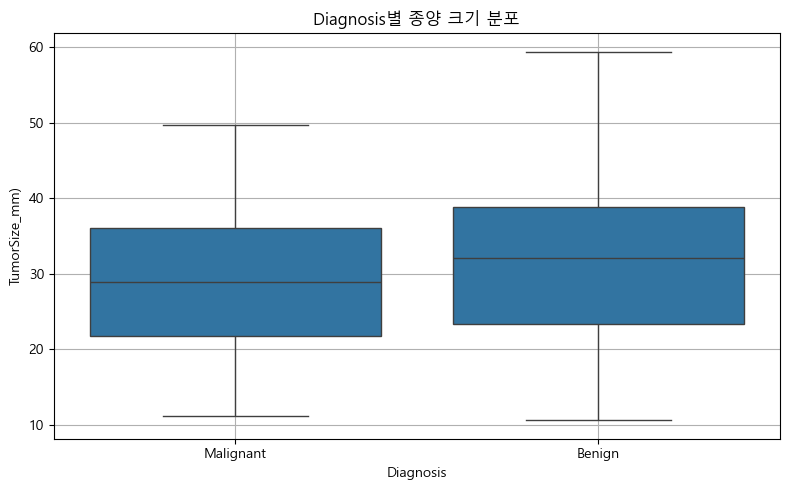

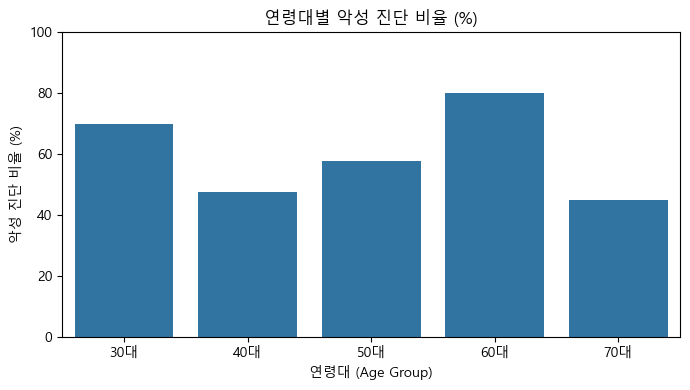

In [18]:
# 진단별 종양 크기 분포 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='TumorSize_mm', data=df)
plt.title('Diagnosis별 종양 크기 분포')
plt.xlabel('Diagnosis')
plt.ylabel('TumorSize_mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 연령대별 악성 진단 비율 시각화
plt.figure(figsize=(7, 4))
sns.barplot(x=age_grouped.index, y=age_grouped['Malignant_Rate'])
plt.title('연령대별 악성 진단 비율 (%)')
plt.ylabel('악성 진단 비율 (%)')
plt.xlabel('연령대 (Age Group)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# 결론 요약
- Malignant 그룹은 평균적으로 더 큰 종양 크기를 보인다.
- 60~70대 이상 연령대에서 악성 진단 비율이 높다.
- 나이와 종양 크기를 함께 고려한 조기 진단 시스템의 중요성이 강조된다.